## Introduction to Convolutional Neural Network Using the Fashion MNIST Dataset

Welcome to this introductory tutorial on Convolutional Neural Networks (CNNs) using the Fashion MNIST dataset. This tutorial is designed for beginners who are new to neural networks and TensorFlow, a powerful library for machine learning. By the end of this guide, you will have a basic understanding of how to build and train a CNN to classify clothing images.

### What is the Fashion MNIST Dataset?

Fashion MNIST is a dataset developed as a more challenging replacement for the traditional MNIST dataset. Instead of handwritten digits, it contains 70,000 grayscale images of 10 fashion categories. Each image is 28x28 pixels and represents a specific type of clothing, such as T-shirts, dresses, and shoes. This dataset is widely used for benchmarking machine learning algorithms.

In this tutorial, we will first implement the classical artificial neural network before implementing the convolutional neural network.

### Prerequisites

* Basic understanding of Python programming
* TensorFlow and Keras installed. (TensorFlow 2.x is recommended as it includes Keras by default.)

### Setting Up Your Environment

First, we'll import the necessary libraries:

* `TensorFlow` for building and training the neural network.
* `Keras`, a high-level neural networks API, which is now integrated into TensorFlow.
* `NumPy` for numerical operations.
* `Matplotlib` for plotting and visualizing data.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

1. `fashion_mnist = keras.datasets.fashion_mnist`: This line is doing two things:
    - `keras.datasets.fashion_mnist` refers to the Fashion MNIST dataset which is part of the datasets available in Keras. The Fashion MNIST dataset is a collection of 70,000 grayscale images of 10 different types of clothing items, like shirts, dresses, and shoes.
    - `fashion_mnist =` is assigning this dataset to a variable named `fashion_mnist`. This means that we can use the variable `fashion_mnist` to access the dataset.

2. `(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()`: This line is where the dataset is actually loaded into the program. Let's break it down:
    - `fashion_mnist.load_data()` is a function call that loads the Fashion MNIST dataset. It returns four arrays:
        - `x_train`: The images that you'll use to train the neural network. Each image is represented as a 28x28 array of grayscale pixel values.
        - `y_train`: The labels for the training images. Each label is an integer from 0 to 9, corresponding to the type of clothing item in the image (e.g., 0 might be a T-shirt/top, 1 might be a trouser, etc.).
        - `x_test`: The images that you'll use to test the neural network. Like `x_train`, these are 28x28 arrays of grayscale pixel values.
        - `y_test`: The labels for the test images, using the same integer coding as `y_train`.
    - `(x_train, y_train), (x_test, y_test) =` is a form of multiple assignment in Python. It assigns the returned arrays to the variables `x_train`, `y_train`, `x_test`, and `y_test` respectively. This way, you have your training data (`x_train`, `y_train`) and your testing data (`x_test`, `y_test`) neatly separated and labeled for use in training and evaluating a machine learning model.


In [4]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

1. `x_train = x_train / 255.0`: 
    - This line of code performs normalization on the training dataset (`x_train`). 
    - Each image in `x_train` is represented as a 28x28 array with pixel values ranging from 0 to 255 (since the images are in grayscale). 
    - Dividing each pixel value by 255 scales these values to a range between 0 and 1. 
    - This scaling is important because it helps in reducing the complexity of the model's computations and makes the training process faster and more stable.

2. `x_test = x_test / 255.0`: 
    - Similarly, this line normalizes the testing dataset (`x_test`). 
    - Just like the training dataset, the pixel values in the test images are also divided by 255 to bring them into the range of 0 to 1. 
    - It's crucial to apply the same normalization to both training and testing data to ensure consistency in the data that the model sees during training and evaluation.


In [7]:
x_train[0].shape

(28, 28)

In [5]:
# Flatten the images
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

1. `x_train_flattened = x_train.reshape(len(x_train), 28*28)`:
    - `x_train.reshape(len(x_train), 28*28)` is a function call that reshapes the training dataset (`x_train`).
    - Each image in `x_train` is currently a 28x28 array of pixel values. This line reshapes each image into a 1D array of 784 elements (since 28*28 = 784).
    - `len(x_train)` is used to maintain the number of images in the dataset. So, the shape of `x_train_flattened` will be [number of images x 784].
    - This transformation is necessary for certain types of neural networks that require input to be a 1D array, such as a basic dense (fully connected) network.

2. `x_test_flattened = x_test.reshape(len(x_test), 28*28)`:
    - Similarly, this line reshapes the testing dataset (`x_test`).
    - Each image in `x_test` is also converted from a 28x28 array into a 1D array of 784 elements.
    - It’s important to apply the same transformation to both the training and testing datasets to ensure consistency in the model's input format.



In [6]:
# Build the Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Change to softmax for multi-class classification
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(x_train_flattened, y_train, epochs=200)

Epoch 1/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4858 - accuracy: 0.8252
Epoch 2/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3638 - accuracy: 0.8664
Epoch 3/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3293 - accuracy: 0.8787
Epoch 4/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3061 - accuracy: 0.8860
Epoch 5/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2901 - accuracy: 0.8923
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2738 - accuracy: 0.8967
Epoch 7/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2617 - accuracy: 0.9018
Epoch 8/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2520 - accuracy: 0.9055
Epoch 9/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2438 - accuracy: 0.9086
Epoch 10/200
1875/1875 [==============================] - 3s 1ms/step - l

### Build the Neural Network Model

1. `model = keras.Sequential([...])`:
    - This line of code creates a neural network model.
    - `keras.Sequential` is used to define a linear stack of layers in the neural network.
    - Inside the `Sequential` constructor, we define the layers of the network:
        - `keras.layers.Dense(100, input_shape=(784,), activation='relu')`: This is the first layer of the network, a dense (fully connected) layer with 100 neurons. `input_shape=(784,)` specifies the shape of the input data (flattened 784 elements from the 28x28 images). `activation='relu'` sets the Rectified Linear Unit (ReLU) activation function for this layer.
        - `keras.layers.Dense(150, activation='relu')`: This is the second dense layer with 150 neurons and ReLU activation function.
        - `keras.layers.Dense(10, activation='softmax')`: This is the output layer of the network. It has 10 neurons (one for each class in the dataset). The `softmax` activation function is used for multi-class classification, converting the output to probability scores for each class.

### Compile the Model

2. `model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`:
    - This line compiles the model, preparing it for training.
    - `optimizer='adam'` sets Adam as the optimization algorithm. Adam is an efficient optimization algorithm that adjusts the weights of the network to minimize the loss function.
    - `loss='sparse_categorical_crossentropy'` specifies the loss function. In multi-class classification tasks like this, sparse categorical crossentropy is commonly used.
    - `metrics=['accuracy']` means that the model will track the accuracy metric during training and evaluation.

### Train the Model

3. `model.fit(x_train_flattened, y_train, epochs=200)`:
    - This line trains the model using the training data.
    - `model.fit` is the function to start the training process. `x_train_flattened` and `y_train` are the training data and labels, respectively.
    - `epochs=200` specifies that the training process will run for 200 epochs. An epoch is one complete presentation of the data set to be learned to the learning machine. Training for more epochs can lead to a better model but also risks overfitting if too high.



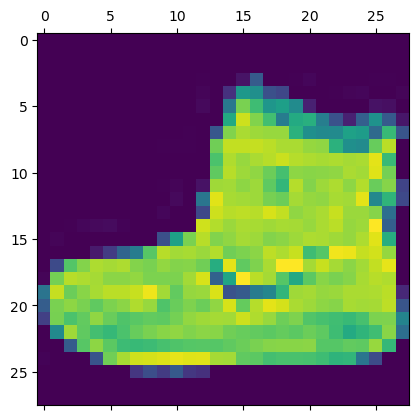

In [7]:
plt.matshow(x_train[0])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 95160 (371.72 KB)
Trainable params: 95160 (371.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


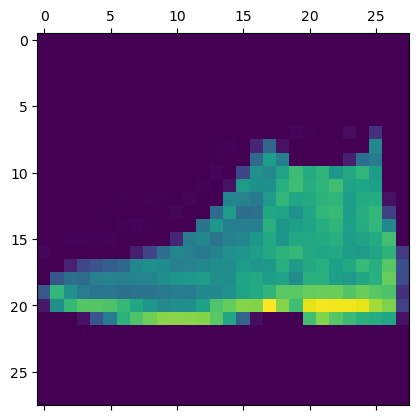

In [9]:
plt.matshow(x_test[0])

## Using Convolutional Neural Network

Convolutional Neural Network is a specialized kind of neural network designed for processing data with a known grid-like topology, such as image data(2D grids of pixels) or time series data(1D grids).

### Key Concepts

1. **Convolution Operation:** At its core, CNNs utilize convolution, a specialized kind of linear operation. Convolution involves applying a kernel (or filter) to the input data to extract features. For instance, in image processing, this could mean highlighting edges or textures.

2. **Pooling:** CNNs often employ pooling to reduce the spatial dimensions (height and width) of the feature maps, thereby reducing computation and model parameters.

3. **Sparse Interactions and Parameter Sharing:** CNNs use smaller kernels to interact with portions of the input, leading to sparse interactions. This, along with parameter sharing (using the same kernel across the input), makes CNNs computationally efficient and reduces the number of parameters.

4. **Equivariant Representations:** CNNs are designed to be equivariant to input transformations, meaning if the input is shifted or transformed, the output shifts in the same way. This property is particularly useful for tasks like image and speech recognition, where the relative position of features is more important than their absolute position.

5. **Handling Variable Input Sizes:** CNNs can handle inputs of variable sizes, making them versatile for different types of data.

6. **Applications:** CNNs have been tremendously successful in practical applications, particularly in areas like image and speech recognition. 

### Why "Convolutional":

The "convolutional" part of the name comes from the mathematical operation called convolution. Don't get intimidated by this term! In the context of a CNN, convolution is essentially a way of filtering your data. Imagine sliding a small window across an image – at each window position, the convolution operation involves multiplying the values of your window with the values in the image where the window is, summing them all up, and then putting this sum into a new image. This process is repeated across the whole image.

### CNNs and Images:

CNNs are particularly powerful for tasks involving images. This is because they can pick up on patterns like edges, shapes, and textures to help the network understand the image as a whole.

### Layers in CNN:

1. Convolutional Layers: These are the core building blocks of a CNN. They apply different filters (like edge detection, blur, etc.) to the input (like an image) and create feature maps. Each filter helps in identifying different features in the image.

2. Pooling Layers: These layers follow convolutional layers and are used to reduce the spatial size (width and height) of the feature maps. This reduces the amount of computation and parameters, helping to prevent overfitting. Common pooling methods include max pooling (taking the maximum value in a window) and average pooling.

3. Flattening: After several convolutional and pooling layers, the high-level reasoning in the neural network is done via fully connected layers. However, to connect a 3D volume to a fully connected layer, we must first flatten it into a 1D vector.

4. Fully Connected Layers: These layers connect every neuron from one layer to every neuron in the next layer, similar to regular neural networks. It's where the network combines all the learned features from the previous layers to determine the final output, such as the classification of the image.

5. Output Layer: This layer gives the final output. For example, in a classification task, it would give the probabilities of the image being each class.

### How it Learns:

The CNN learns through a process called backpropagation. In simple terms, it involves:

* Feeding the network with input data (like images).
* Letting the network make a prediction.
* Comparing the prediction with the actual label.
* Adjusting the weights of the filters (the parameters of the model) to reduce errors in predictions.
  
### Why CNNs are Great:

CNNs are excellent for image processing because they can capture spatial hierarchies in the data. For example, the first layer might recognize edges, the next layer could recognize textures, then patterns, and finally specific objects.

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(30, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

### Build the Convolutional Neural Network Model

1. `model = keras.Sequential([...])`:
    - This line of code initiates the creation of a CNN model.
    - `keras.Sequential` is used here again to define a sequential layer arrangement for the neural network.

2. Inside the `Sequential` constructor, the layers of the CNN are defined:
    - `keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1))`: This is the first layer, a convolutional layer.
        - It has 30 filters (kernels), each of size 3x3.
        - `activation='relu'` specifies the use of the ReLU (Rectified Linear Unit) activation function.
        - `input_shape=(28, 28, 1)` denotes the expected input shape for the layer, which is 28x28 pixels with 1 color channel (grayscale).
    - `keras.layers.MaxPool2D((2,2))`: This is a max pooling layer.
        - It reduces the spatial dimensions (height and width) of the input volume for the next convolutional layer.
        - `(2,2)` specifies the size of the window over which to take the maximum.
    - `keras.layers.Flatten()`: This layer flattens the 2D arrays to a 1D array to be fed into the dense layers.
        - After convolutional and pooling layers, it's common to flatten the features to pass them through dense layers for classification.
    - `keras.layers.Dense(100, activation='relu')`: A dense layer with 100 neurons and ReLU activation function.
    - `keras.layers.Dense(10, activation='sigmoid')`: The output layer of the network.
        - It has 10 neurons since there are 10 classes to predict.
        - `activation='sigmoid'` is used here. However, for multi-class classification tasks, `softmax` is generally more appropriate. The use of `sigmoid` might be a specific design choice or an oversight.



In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4094 - accuracy: 0.8542
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2705 - accuracy: 0.9017
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2255 - accuracy: 0.9174
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1933 - accuracy: 0.9299
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1680 - accuracy: 0.9388
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1442 - accuracy: 0.9469
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1243 - accuracy: 0.9538
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1066 - accuracy: 0.9609
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0914 - accuracy: 0.9663
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

### Compile the CNN Model

1. `model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`:
    - This line compiles the model, which is a necessary step before training.
    - `optimizer='adam'`: This sets the Adam optimizer for the training process. Adam is a popular choice as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
    - `loss='sparse_categorical_crossentropy'`: Specifies the loss function to be used. For multi-class classification problems like this (with integer labels), sparse categorical crossentropy is typically used.
    - `metrics=['accuracy']`: Indicates that the model should track accuracy during training and evaluation. This metric is used to evaluate the performance of the model, with higher accuracy indicating better performance.

### Train the CNN Model

2. `model.fit(x_train, y_train, epochs=100)`:
    - This line initiates the training of the model using the training data.
    - `model.fit` is the method used for training. 
    - `x_train` and `y_train` are the training dataset and corresponding labels.
    - `epochs=100` specifies that the training process should run for 100 epochs. An epoch is a full iteration over the entire training dataset. The choice of 100 epochs means the model will have ample opportunity to learn from the data, though care must be taken to avoid overfitting.


In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3088 - accuracy: 0.9154


[0.30879437923431396, 0.9154000282287598]